In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
import pmdarima

In [3]:
import pandas_datareader as pdr
import fix_yahoo_finance as yf
from pandas_datareader import data

In [4]:
sns.set_style('darkgrid')

In [6]:
#Collecting apple data 
data = yf.download('AAPL','2014-01-01','2020-01-01')
data.head

[*********************100%***********************]  1 of 1 downloaded


<bound method NDFrame.head of                   Open        High         Low       Close   Adj Close  \
Date                                                                     
2013-12-31   79.167145   80.182854   79.142860   80.145714   72.121513   
2014-01-02   79.382858   79.575714   78.860001   79.018570   71.107201   
2014-01-03   78.980003   79.099998   77.204285   77.282860   69.545288   
2014-01-06   76.778572   78.114288   76.228569   77.704285   69.924515   
2014-01-07   77.760002   77.994286   76.845711   77.148575   69.424438   
2014-01-08   76.972855   77.937141   76.955711   77.637146   69.864105   
2014-01-09   78.114288   78.122856   76.478569   76.645714   68.971939   
2014-01-10   77.118568   77.257141   75.872856   76.134285   68.511696   
2014-01-13   75.701431   77.500000   75.697144   76.532860   68.870354   
2014-01-14   76.888573   78.104286   76.808571   78.055717   70.240776   
2014-01-15   79.074287   80.028572   78.808571   79.622856   71.651016   
2014-01-

In [7]:
data.index #to check the date format

DatetimeIndex(['2013-12-31', '2014-01-02', '2014-01-03', '2014-01-06',
               '2014-01-07', '2014-01-08', '2014-01-09', '2014-01-10',
               '2014-01-13', '2014-01-14',
               ...
               '2019-12-17', '2019-12-18', '2019-12-19', '2019-12-20',
               '2019-12-23', '2019-12-24', '2019-12-26', '2019-12-27',
               '2019-12-30', '2019-12-31'],
              dtype='datetime64[ns]', name='Date', length=1511, freq=None)

In [8]:
data['Year'] = data.index.year


In [9]:
data['Month'] = data.index.month
data['day'] = data.index.day

In [10]:
# Display a random sampling of 5 rows
data.sample(5, random_state=0)

,Open,High,Low,Close,Adj Close,Volume,Year,Month,day
Date,,,,,,,,,
2015-11-03,120.790001,123.489998,120.699997,122.570000,114.050095,45519000,2015,11,3
2014-03-19,76.037140,76.605713,75.571426,75.894287,68.704536,56189000,2014,3,19
2014-02-20,76.141426,76.714287,75.571426,75.878571,68.690308,76464500,2014,2,20
2017-10-03,154.009995,155.089996,153.910004,154.479996,149.405106,16230300,2017,10,3
2014-01-14,76.888573,78.104286,76.808571,78.055717,70.240776,83140400,2014,1,14


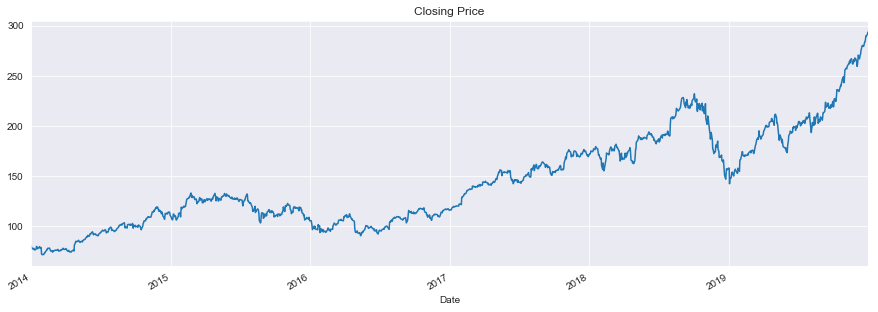

In [12]:
temp = data.groupby("Date")['Close'].mean()
temp.plot(figsize=(15,5), title='Closing Price')
plt.show()

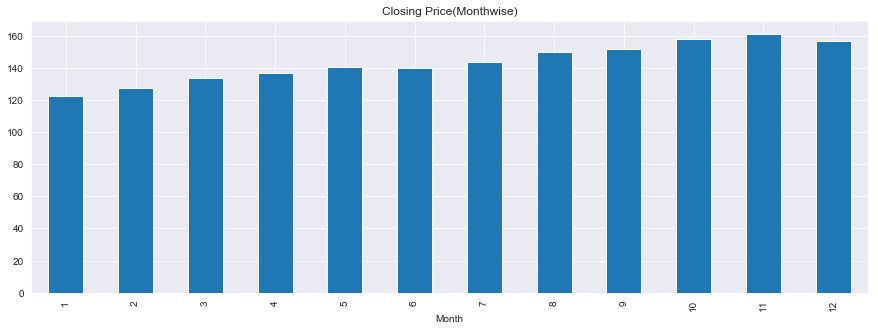

In [15]:
temp = data.groupby('Month')['Close'].mean()
temp.plot(figsize=(15,5), title='Closing Price(Monthwise)',kind='bar')
plt.show()

### Modelling the data set

In [17]:
train = data.loc[:'2019-01-01']
train.tail()

,Open,High,Low,Close,Adj Close,Volume,Year,Month,day
Date,,,,,,,,,
2018-12-24,148.149994,151.550003,146.589996,146.830002,144.656540,37169200,2018,12,24
2018-12-26,148.300003,157.229996,146.720001,157.169998,154.843475,58582500,2018,12,26
2018-12-27,155.839996,156.770004,150.070007,156.149994,153.838562,53117100,2018,12,27
2018-12-28,157.500000,158.520004,154.550003,156.229996,153.917389,42291400,2018,12,28
2018-12-31,158.529999,159.360001,156.479996,157.740005,155.405045,35003500,2018,12,31


In [20]:
test=data.loc['2019-01-01':]
test.head()

,Open,High,Low,Close,Adj Close,Volume,Year,Month,day
Date,,,,,,,,,
2019-01-02,154.889999,158.850006,154.229996,157.919998,155.582367,37039700,2019,1,2
2019-01-03,143.979996,145.720001,142.000000,142.190002,140.085220,91312200,2019,1,3
2019-01-04,144.529999,148.550003,143.800003,148.259995,146.065353,58607100,2019,1,4
2019-01-07,148.699997,148.830002,145.899994,147.929993,145.740265,54777800,2019,1,7
2019-01-08,149.559998,151.820007,148.520004,150.750000,148.518509,41025300,2019,1,8


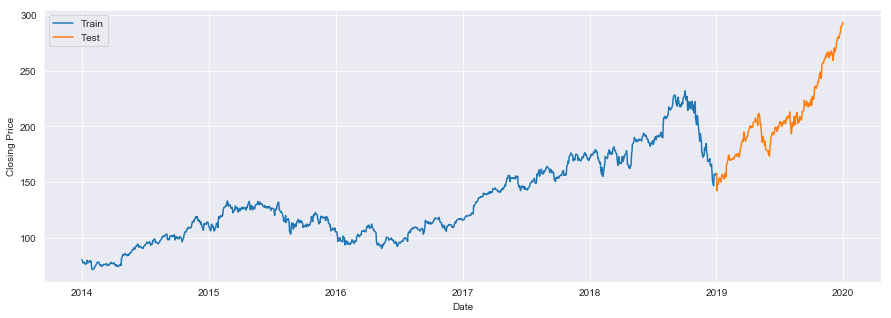

In [21]:
plt.figure(figsize=(15,5))
plt.plot(train['Close'], label='Train')
plt.plot(test['Close'], label='Test')
plt.ylabel('Closing Price')
plt.xlabel('Date')
plt.legend(loc='best')
plt.show()

### Stationary Test

In [22]:
from statsmodels.tsa.stattools import adfuller

In [27]:
def test_stationary(timeseries):
    mean = timeseries.rolling(12).mean()
    std = timeseries.rolling(12).std()
    plt.figure(figsize=(15,5))
    plt.plot(timeseries, label='Original', color='blue')
    plt.plot(mean, label='Rolling Mean', color='Red')
    plt.plot(std, label='Rolling Std', color='k')
    plt.legend(loc='best')
    plt.show()
    
    print("Result of Dicky-Fuller Test")
    result = adfuller(timeseries, autolag='AIC')
    output=pd.Series(result[:4],index=['Test Statistics','p-value','No of lags','No of observation'])
    for key, values in result[4].items():
        output['Critical values (%s)'%key] = values
    print(output)
    

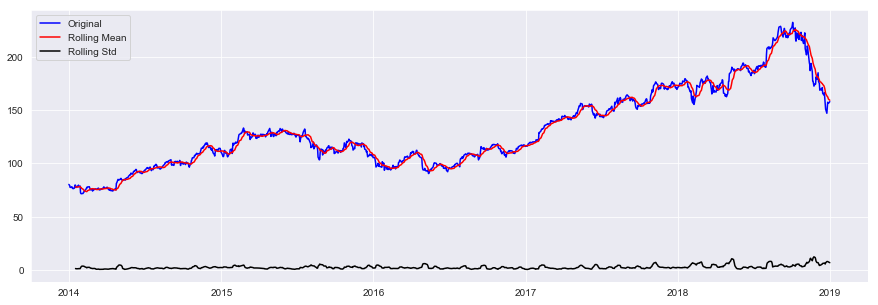

Result of Dicky-Fuller Test
Test Statistics            -1.418515
p-value                     0.573368
No of lags                  8.000000
No of observation        1250.000000
Critical values (1%)       -3.435592
Critical values (5%)       -2.863855
Critical values (10%)      -2.568003
dtype: float64


In [28]:
test_stationary(train['Close'])

### Making the time series stationary

In [29]:
## Removing the trend

# We will do log transformation which is penalising the higher values more than the smaller values

train_log = np.log(train['Close'])
test_log = np.log(test['Close'])

In [30]:
moving_avg = train_log.rolling(24).mean()

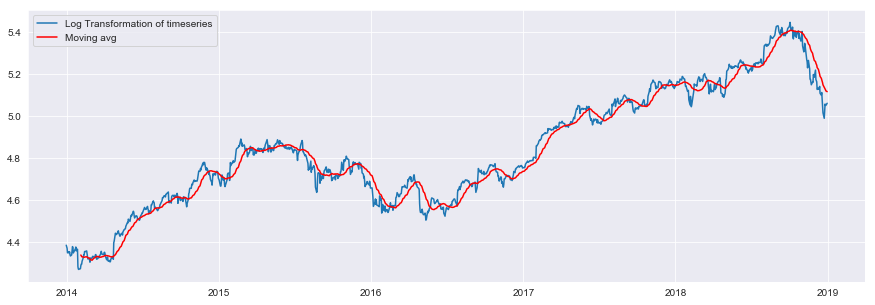

In [31]:
plt.figure(figsize=(15,5))
plt.plot(train_log, label='Log Transformation of timeseries')
plt.plot(moving_avg, color='red', label='Moving avg')
plt.legend(loc='best')
plt.show()

In [32]:
## From the above graph we can see there is a trend . To make the time series stationary we have to remove the trend
train_log_moving_diff = train_log - moving_avg

In [33]:
train_log_moving_diff.dropna(inplace=True)

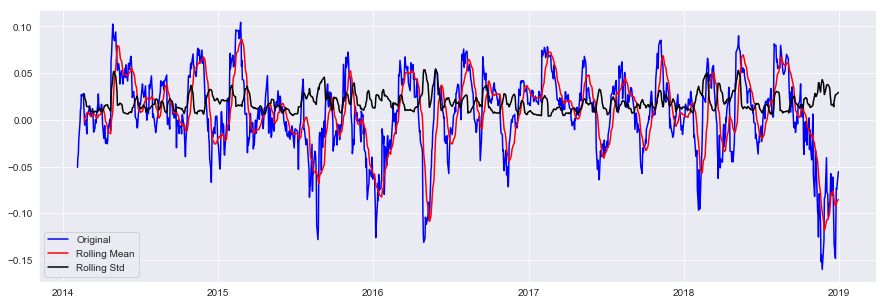

Result of Dicky-Fuller Test
Test Statistics         -6.546575e+00
p-value                  9.067853e-09
No of lags               7.000000e+00
No of observation        1.228000e+03
Critical values (1%)    -3.435686e+00
Critical values (5%)    -2.863896e+00
Critical values (10%)   -2.568025e+00
dtype: float64


In [34]:
test_stationary(train_log_moving_diff)

In [35]:
## Stabilize the mean : a requirement for a stationary time series
train_log_diff = train_log - train_log.shift(1)

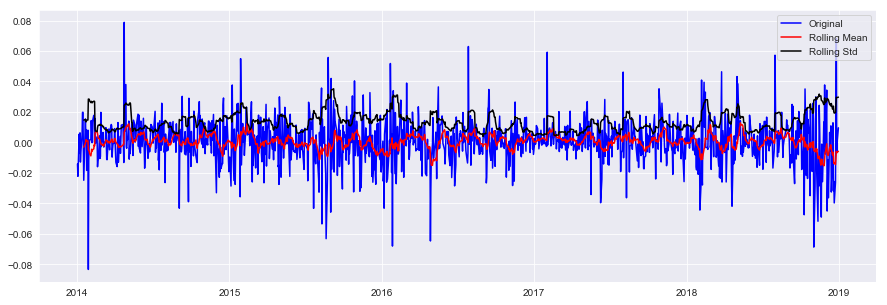

Result of Dicky-Fuller Test
Test Statistics           -34.249963
p-value                     0.000000
No of lags                  0.000000
No of observation        1257.000000
Critical values (1%)       -3.435563
Critical values (5%)       -2.863842
Critical values (10%)      -2.567996
dtype: float64


In [36]:
test_stationary(train_log_diff.dropna())

### Remove Seasonality

In [37]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [38]:
decomposition = seasonal_decompose(pd.DataFrame(train_log).Close.values, freq = 24)

In [39]:
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

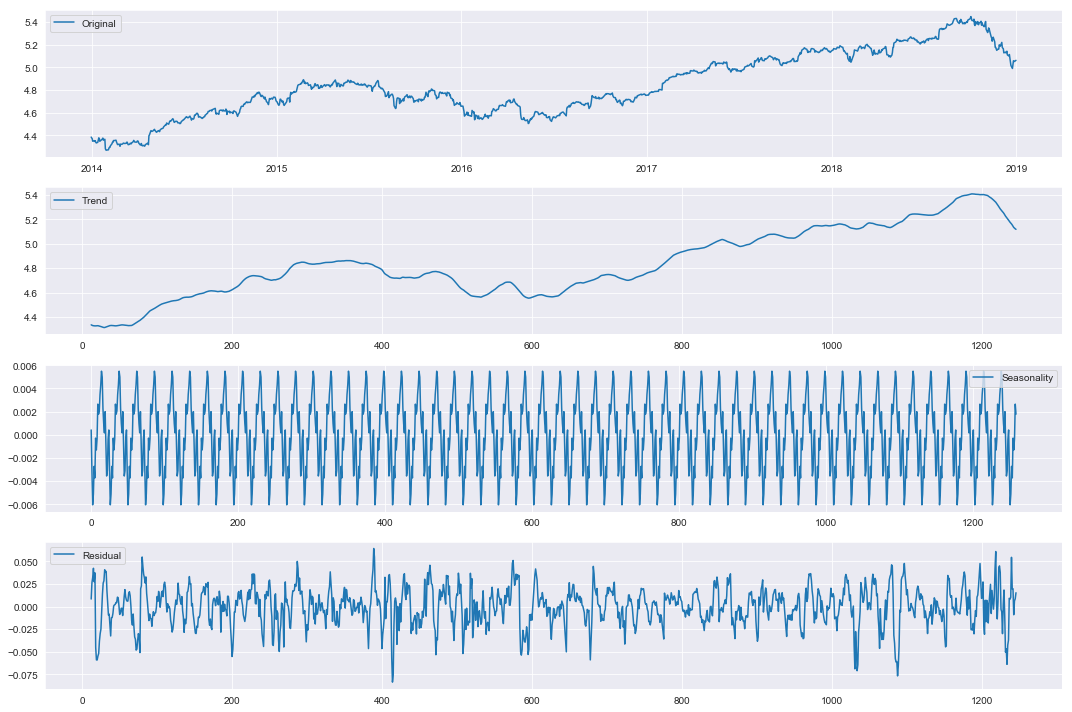

In [40]:
#plot the trend, seasonality and residual
plt.figure(figsize=(15,10))
plt.subplot(411)
plt.plot(train_log, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal, label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residual')
plt.legend(loc='best')
plt.tight_layout() 
plt.show()

In [41]:
train_log_decompose = pd.DataFrame(residual)
train_log_decompose['Date'] = train_log.index
train_log_decompose.set_index('Date', inplace = True)
train_log_decompose.dropna(inplace = True)


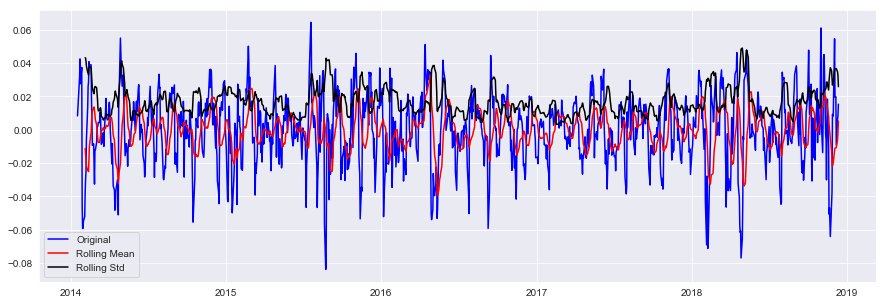

Result of Dicky-Fuller Test
Test Statistics         -1.405796e+01
p-value                  3.092943e-26
No of lags               9.000000e+00
No of observation        1.225000e+03
Critical values (1%)    -3.435699e+00
Critical values (5%)    -2.863902e+00
Critical values (10%)   -2.568028e+00
dtype: float64


In [42]:
test_stationary(train_log_decompose[0])

### ARIMA Model

In [43]:
from pmdarima import auto_arima

In [44]:
model = auto_arima(train_log, trace=True,error_action='ignore',suppress_warnings=True)
model.fit(train_log)


Fit ARIMA: order=(2, 1, 2) seasonal_order=(0, 0, 0, 1); AIC=-6973.700, BIC=-6942.876, Fit time=2.221 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 0, 0, 1); AIC=-6978.305, BIC=-6968.030, Fit time=0.214 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(0, 0, 0, 1); AIC=-6977.757, BIC=-6962.345, Fit time=0.373 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 0, 0, 1); AIC=-6977.822, BIC=-6962.410, Fit time=0.261 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 0, 0, 1); AIC=-6978.704, BIC=-6973.566, Fit time=0.252 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 0, 0, 1); AIC=-6975.960, BIC=-6955.411, Fit time=1.610 seconds
Total fit time: 5.282 seconds


ARIMA(maxiter=50, method='lbfgs', order=(0, 1, 0), out_of_sample_size=0,
   scoring='mse', scoring_args=None, seasonal_order=(0, 0, 0, 1),
   start_params=None, suppress_warnings=True, trend=None,
   with_intercept=False)

In [46]:
forecast = model.predict(n_periods=len(test))
forecast = pd.DataFrame(forecast, index=test_log.index, columns=['Prediction'])

In [51]:
forecast.head()

,Prediction
Date,
2019-01-02,5.060948
2019-01-03,5.060948
2019-01-04,5.060948
2019-01-07,5.060948
2019-01-08,5.060948


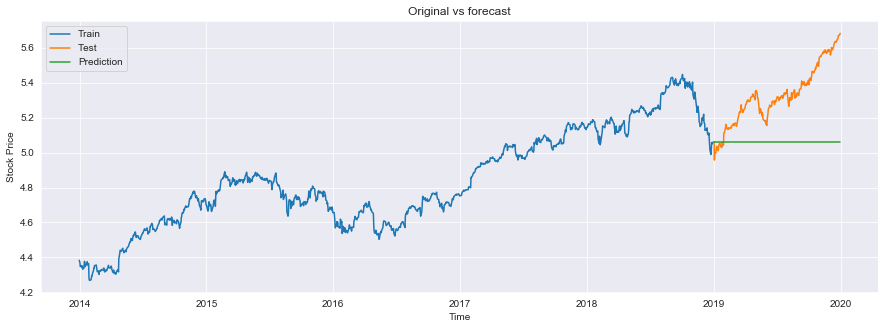

In [48]:
## Plot the prediction
plt.figure(figsize=(15,5))
plt.plot(train_log, label="Train")
plt.plot(test_log, label ='Test')
plt.plot(forecast, label='Prediction')
plt.title("Original vs forecast")
plt.ylabel("Stock Price")
plt.xlabel('Time')
plt.legend(loc='best')
plt.show()

In [49]:
from sklearn.metrics import mean_squared_error

In [50]:
print(np.sqrt(mean_squared_error(test_log, forecast)))

0.31034198499034504


### Another way to use ARIMA model

In [52]:
from statsmodels.tsa.stattools import acf, pacf

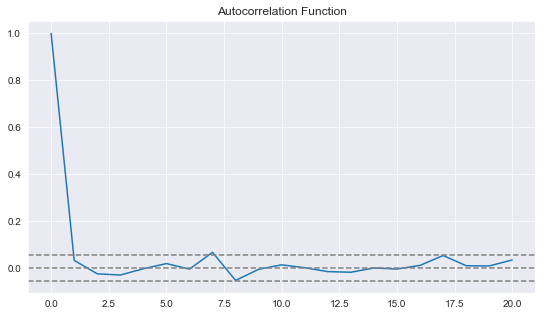

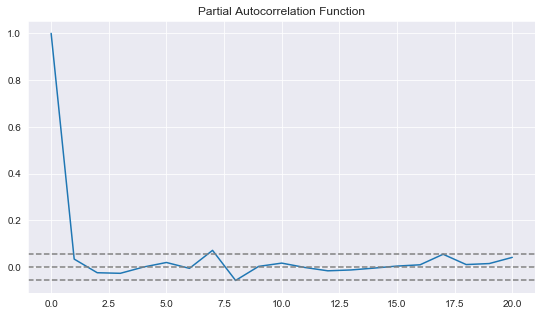

<Figure size 432x288 with 0 Axes>

In [55]:
lag_acf = acf(train_log_diff.dropna(), nlags=20)
lag_pacf = pacf(train_log_diff.dropna(), nlags=20, method='ols')

plt.figure(figsize=(20,5))
plt.subplot(121) 
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(train_log_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(train_log_diff)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')
plt.show()


plt.figure(figsize=(20,5))
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(train_log_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(train_log_diff)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.show()
plt.tight_layout()

In [57]:
from statsmodels.tsa.arima_model import ARIMA


C:\Users\User\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\User\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


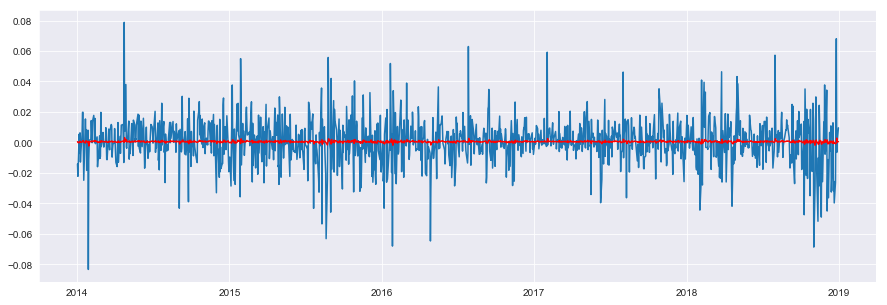

In [58]:
##AR Model
model = ARIMA(train_log, order=(1, 1, 0), freq=train_log.index.inferred_freq)  
results_AR = model.fit(disp=-1) 
plt.figure(figsize=(15,5))
plt.plot(train_log_diff)
plt.plot(results_AR.fittedvalues, color='red')
plt.show()

C:\Users\User\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\User\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


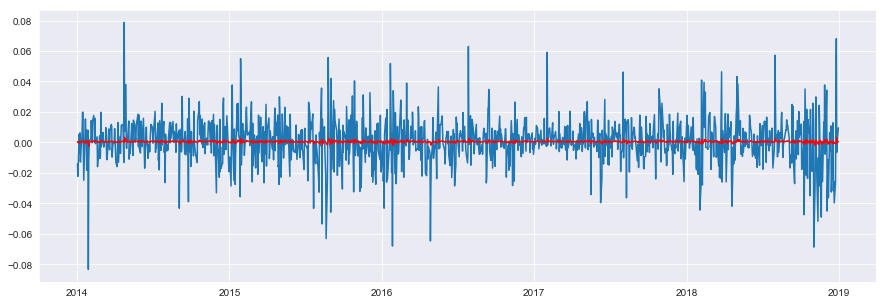

In [59]:
## MA Model
model = ARIMA(train_log,order=(0, 1, 1), freq=train_log.index.inferred_freq)  
results_MA = model.fit(disp=-1)  
plt.figure(figsize = (15,5))
plt.plot(train_log_diff.dropna())
plt.plot(results_MA.fittedvalues, color='red')
plt.show()

In [60]:
model = ARIMA(train_log, order=(1, 1, 1), freq=train_log.index.inferred_freq)  
results_ARIMA = model.fit(disp=-1)
print(results_ARIMA.summary())


C:\Users\User\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\User\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


                             ARIMA Model Results                              
Dep. Variable:                D.Close   No. Observations:                 1258
Model:                 ARIMA(1, 1, 1)   Log Likelihood                3492.028
Method:                       css-mle   S.D. of innovations              0.015
Date:                Sun, 19 Jan 2020   AIC                          -6976.057
Time:                        23:57:59   BIC                          -6955.508
Sample:                             1   HQIC                         -6968.334
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0005      0.000      1.231      0.219      -0.000       0.001
ar.L1.D.Close    -0.2487      0.580     -0.429      0.668      -1.385       0.887
ma.L1.D.Close     0.2849      0.573     

In [62]:
fc, se, conf = results_ARIMA.forecast(252, alpha=0.05)  # 95% conf
forecast_series = pd.Series(fc, index=test.index)
lower_series = pd.Series(conf[:,0],index=test.index)
upper_series = pd.Series(conf[:,1],index=test.index)

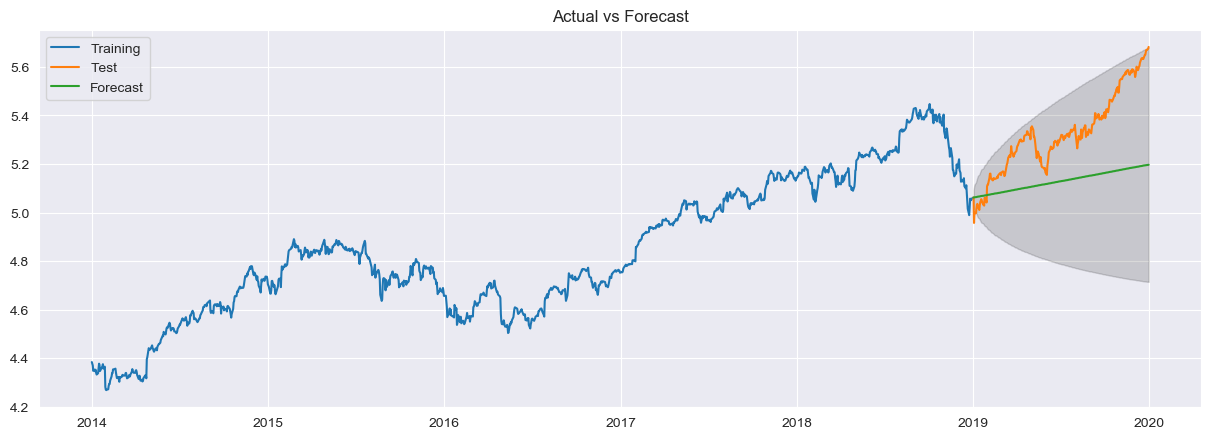

In [63]:
#Plot
plt.figure(figsize=(15,5),dpi=100)
plt.plot(train_log, label='Training')
plt.plot(test_log, label ='Test')
plt.plot(forecast_series, label='Forecast')
plt.fill_between(lower_series.index,lower_series,upper_series,color='k',alpha=0.15)
plt.title('Actual vs Forecast')
plt.legend(loc='best')
plt.show()

In [64]:
rms = np.sqrt(mean_squared_error(test_log,forecast_series))
print("RMSE: ", rms)

RMSE:  0.23332644592212437
